## STATISTICS FOR THE AXIAL CODING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read files that contain the data of the 3 different types of Subjects contained in the single file below
df_full = pd.read_excel('../Data/harmonized_info/00_full_subjects.xlsx')
df_full.replace('', np.nan, inplace = True)
df_full.head()

,DOI,"Location in the article (Page, section)",Survey,ID - Survey,Interview,Line (or range*),Input,Technique,Purpose_Output,ML pipeline Stage,...,Var5 - ML Principles,Var6 - ML Challenges,Var7 - Challenges to ensure quality attributes,Var 8 - Reviewer´s perspective,Var9 - Educator's perspective,Round,Tagger/merge,Venue,Year,subject
0,10.1109 ASE.2013.6693093,"Page 347, section IV A",NaN,NaN,NaN,NaN,code data,extract the methods using the AST,to extract program construct identifiers,Feature Engineering,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ASE,2013.0,papers
1,10.1109 ASE.2013.6693093,"Page 348, section IV B",NaN,NaN,NaN,NaN,code data (identifiers),keep compound identifiers,to tokenize textual data,Data Cleaning,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ASE,2013.0,papers
2,10.1109 ASE.2013.6693093,"Page 348, section IV B",NaN,NaN,NaN,NaN,code data (identifiers),tokenize by capital letters,to tokenize textual data,Data Cleaning,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ASE,2013.0,papers
3,10.1109 ASE.2013.6693093,"Page 348, section IV B",NaN,NaN,NaN,NaN,code data (identifiers),remove punctuation,to tokenize code data,Data Cleaning,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ASE,2013.0,papers
4,10.1109 ASE.2013.6693093,"Page 348, section IV B",NaN,NaN,NaN,NaN,code data (identifiers),extract identifiers from AST without language ...,to tokenize code data,Data Cleaning,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ASE,2013.0,papers


In [3]:
df_full.shape


(2712, 22)

In [4]:
df_full.columns

Index(['DOI', 'Location in the article (Page, section)', 'Survey',
       'ID - Survey', 'Interview', 'Line (or range*)', 'Input', 'Technique',
       'Purpose_Output', 'ML pipeline Stage', 'Software engineering task',
       'Var4 - Quality attributes', 'Var5 - ML Principles',
       'Var6 - ML Challenges',
       'Var7 - Challenges to ensure quality attributes',
       'Var 8 - Reviewer´s  perspective', 'Var9 - Educator's perspective',
       'Round', 'Tagger/merge', 'Venue', 'Year', 'subject'],
      dtype='object')

In [5]:
print('number of unique surveys: ',len(df_full['Survey'].dropna().unique()))
print('number of unique interviews: ',len(df_full['Interview'].dropna().unique()))
print('number of unique interviews: ',len(df_full['DOI'].dropna().unique())) # this has false positives (7)

number of unique surveys:  47
number of unique interviews:  14
number of unique interviews:  117


In [6]:
# get the unique values of type in the dataframe
df_full['subject'].value_counts()

subject
papers        1481
interviews     996
surveys        235
Name: count, dtype: int64

In [7]:
df_full['subject'].value_counts().sum()

2712

In [8]:
# Display  the columns in which Var6 - ML Challenges',        'Var7 - Challenges to ensure quality attributes' are not empty at the same time
df_full.loc[df_full['Var6 - ML Challenges'].notnull() & df_full['Var7 - Challenges to ensure quality attributes'].notnull(), ['Var6 - ML Challenges', 'Var7 - Challenges to ensure quality attributes']]

,Var6 - ML Challenges,Var7 - Challenges to ensure quality attributes


In [9]:
df_full['Challenges'] = df_full['Var6 - ML Challenges'].fillna('') + df_full['Var7 - Challenges to ensure quality attributes'].fillna('')
df_full.replace('', np.nan, inplace = True)

In [10]:
# get the number of unique values of Input in general and for each different subject
df_full['Input'].value_counts()
df_full['Input'].value_counts(normalize=True)   # normalize=True to get the percentage of each value
df_full['Input'].value_counts(normalize=True, dropna=False) # dropna=False to keep the NaN values
df_full['Input'].value_counts(normalize=True, dropna=False, sort=False) # sort=False to keep the order of the values

# get the number of unique values in the rest of columns for each different value in subject column
df_full.groupby('subject')[['Input', 'Technique',
       'Purpose_Output', 'ML pipeline Stage', 'Software engineering task',
       'Var4 - Quality attributes', 'Var5 - ML Principles',
       'Challenges',
       'Var 8 - Reviewer´s  perspective', "Var9 - Educator's perspective"]].nunique().T

# Create a new dataframe with: add a total column to the previous dataframe	and a total   and asign this to a new dataframe
df_unique_codes = (df_full.groupby('subject')[['Input', 'Technique',
       'Purpose_Output', 'ML pipeline Stage', 'Software engineering task',
       'Var4 - Quality attributes', 'Var5 - ML Principles',
       'Challenges',
       'Var 8 - Reviewer´s  perspective', "Var9 - Educator's perspective"]].nunique().T)

# Add to this datagrame a new column with the total of unique values for each row
df_unique_codes['Total'] = df_unique_codes.sum(axis=1)
df_unique_codes

# Add to this datagrame a new row with the total of unique values for each column
df_unique_codes.loc['Total'] = df_unique_codes.sum()
df_unique_codes

subject,interviews,papers,surveys,Total
Input,70,323,8,401
Technique,447,992,164,1603
Purpose_Output,317,580,45,942
ML pipeline Stage,10,9,9,28
Software engineering task,37,91,0,128
Var4 - Quality attributes,36,0,0,36
Var5 - ML Principles,3,0,0,3
Challenges,89,0,0,89
Var 8 - Reviewer´s perspective,71,0,0,71
Var9 - Educator's perspective,42,0,0,42


In [11]:
# count the unique codes in total for this variables ['Input', 'Technique', 'Purpose_Output', 'ML pipeline Stage', 'Software engineering task','Var4 - Quality attributes', 'Var5 - ML Principles', 'Var6 - ML Challenges', 'Var7 - Challenges to ensure quality attributes','Var 8 - Reviewer´s  perspective', "Var9 - Educator's perspective"] in  df_full 
df_unique_codes_total = pd.DataFrame(df_full[['Input', 'Technique', 'Purpose_Output', 'ML pipeline Stage', 'Software engineering task','Var4 - Quality attributes', 'Var5 - ML Principles', 'Challenges','Var 8 - Reviewer´s  perspective', "Var9 - Educator's perspective"]].nunique())
df_unique_codes_total.columns = ['Total unique']
df_unique_codes_total.loc['In total'] = df_unique_codes_total.sum()
df_unique_codes_total

,Total unique
Input,365
Technique,1457
Purpose_Output,866
ML pipeline Stage,10
Software engineering task,118
Var4 - Quality attributes,36
Var5 - ML Principles,3
Challenges,89
Var 8 - Reviewer´s perspective,71
Var9 - Educator's perspective,42


In [12]:
# read the excel of the categories of the axial codes and the codes for each variable from input to  Var9 - Educator's perspective
df_axial_input = pd.read_excel('../Data/axial_codes/11_unique_input.xlsx')
df_axial_technique = pd.read_excel('../Data/axial_codes/12_unique_technique.xlsx')
df_axial_purpose_output = pd.read_excel('../Data/axial_codes/13_unique_purpose_output.xlsx')
df_axial_ml_pipeline_stage = pd.read_excel('../Data/axial_codes/20_unique_ml_pipeline_stage.xlsx')
df_axial_se_task = pd.read_excel('../Data/axial_codes/30_unique_se_task.xlsx')
df_axial_quality_attributes = pd.read_excel('../Data/axial_codes/40_unique_quality_attributes.xlsx')
df_axial_ml_principles = pd.read_excel('../Data/axial_codes/50_unique_ml_principles.xlsx')
df_axial_challenges = pd.read_excel('../Data/axial_codes/60_70_challenges.xlsx')
df_axial_reviewers_perspective = pd.read_excel('../Data/axial_codes/80_unique_reviewers_perspective.xlsx')
df_axial_educators_perspective = pd.read_excel('../Data/axial_codes/90_unique_educators_perspective.xlsx')


/home/anabanana/miniconda3/envs/gpaper/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [13]:
# create a deep copy of the full dataframe
df_full_copy = df_full.copy()

mapping_input = dict(zip(df_axial_input['Input'], df_axial_input['Group']))
mapping_input[np.nan] = np.nan

mapping_technique = dict(zip(df_axial_technique['Technique'], df_axial_technique['Group']))
mapping_technique[np.nan] = np.nan

mapping_purpose = dict(zip(df_axial_purpose_output['Purpose_Output'], df_axial_purpose_output['Group']))
mapping_purpose[np.nan] = np.nan

#  FOR ML stage is not needed. Therefore, not done

mapping_SE_tasks = dict(zip(df_axial_se_task['Software engineering task'], df_axial_se_task['Group']))
mapping_SE_tasks[np.nan] = np.nan

mapping_QA = dict(zip(df_axial_quality_attributes['Quality attributes'], df_axial_quality_attributes['Group']))
mapping_QA[np.nan] = np.nan

mapping_challenges = dict(zip(df_axial_challenges['ML Challenges'], df_axial_challenges['Group']))
mapping_challenges[np.nan] = np.nan

mapping_reviewers = dict(zip(df_axial_reviewers_perspective['Reviewer´s perspective'], df_axial_reviewers_perspective['Group']))
mapping_reviewers[np.nan] = np.nan

mapping_educators = dict(zip(df_axial_educators_perspective['Educator´s perspective'], df_axial_educators_perspective['Group']))
mapping_educators[np.nan] = np.nan

In [14]:
df_full_copy['Input_axial'] = df_full_copy['Input'].map(mapping_input).fillna("||||||")  
df_full_copy['Technique_axial'] = df_full_copy['Technique'].map(mapping_technique).fillna("||||||")  
df_full_copy['Purpose_Output_axial'] = df_full_copy['Purpose_Output'].map(mapping_purpose).fillna("||||||")  
df_full_copy['SE_axial'] = df_full_copy['Software engineering task'].map(mapping_SE_tasks).fillna("||||||")
df_full_copy['Principles_axial'] = df_full_copy['Var5 - ML Principles']
df_full_copy['Stage_axial'] = df_full_copy['ML pipeline Stage']
df_full_copy['QA_axial'] = df_full_copy['Var4 - Quality attributes'].map(mapping_QA).fillna("||||||")
df_full_copy['Challenges_axial'] = df_full_copy['Challenges'].map(mapping_challenges).fillna("||||||")
df_full_copy['Reviewers_axial'] = df_full_copy['Var 8 - Reviewer´s  perspective'].map(mapping_reviewers).fillna("||||||")
df_full_copy['Educators_axial'] = df_full_copy["Var9 - Educator's perspective"].map(mapping_educators).fillna("||||||")


In [15]:
df_full_copy["Input_axial"].value_counts()

Input_axial
||||||                                               972
data                                                 271
data (textual data)                                  236
data (code data)                                     235
model(s)                                             217
data (ground truth) + results (output)               199
results (metrics)                                    151
deep learning model(s)                                93
data (collaborative knowledge sources)                43
statistical model(s)                                  40
data (numeric)                                        36
results (output)                                      29
data (unverified labels)                              24
embeddings                                            24
problem                                               19
data (images)                                         12
data + model(s)                                       10
data (screenshot)  

In [16]:
def general_remove_non_nan(df, condition_col, target_col):
    def remove_non_nan(row):
        if pd.isna(row[condition_col]) or (row[condition_col] == '-') or (row[condition_col] == ''):  
            return np.nan  # Set target column to NaN if condition column is met
        else:
            return row[target_col]  

    df[target_col] = df.apply(remove_non_nan, axis=1)

In [17]:
# First round
general_remove_non_nan(df_full_copy, 'Input', 'Input_axial')
print("Input_axial", (df_full_copy["Input_axial"]=="||||||").sum())
# First round
general_remove_non_nan(df_full_copy, 'Technique', 'Technique_axial')
print("Input_axial", (df_full_copy["Technique_axial"]=="||||||").sum())
# First round
general_remove_non_nan(df_full_copy, 'Purpose_Output', 'Purpose_Output_axial')
print("Purpose_Output_axial", (df_full_copy["Purpose_Output_axial"]=="||||||").sum())
# First round
general_remove_non_nan(df_full_copy, 'Software engineering task', 'SE_axial')
print("SE_axial", (df_full_copy["SE_axial"]=="||||||").sum())
# First round
general_remove_non_nan(df_full_copy, 'Var4 - Quality attributes', 'QA_axial')
print("QA_axial", (df_full_copy["QA_axial"]=="||||||").sum())
# First round
general_remove_non_nan(df_full_copy, 'Challenges', 'Challenges_axial')
print("Challenges_axial", (df_full_copy["Challenges_axial"]=="||||||").sum())
# First round
general_remove_non_nan(df_full_copy, 'Var 8 - Reviewer´s  perspective', 'Reviewers_axial')
print("Reviewers_axial", (df_full_copy["Reviewers_axial"]=="||||||").sum())
# First round
general_remove_non_nan(df_full_copy, "Var9 - Educator's perspective", 'Educators_axial')
print("Educators_axial", (df_full_copy["Educators_axial"]=="||||||").sum())

Input_axial 0
Input_axial 0
Purpose_Output_axial 0
SE_axial 0
QA_axial 0
Challenges_axial 0
Reviewers_axial 0
Educators_axial 0


# Count in axial codes

In [18]:
df_full_copy.columns

Index(['DOI', 'Location in the article (Page, section)', 'Survey',
       'ID - Survey', 'Interview', 'Line (or range*)', 'Input', 'Technique',
       'Purpose_Output', 'ML pipeline Stage', 'Software engineering task',
       'Var4 - Quality attributes', 'Var5 - ML Principles',
       'Var6 - ML Challenges',
       'Var7 - Challenges to ensure quality attributes',
       'Var 8 - Reviewer´s  perspective', 'Var9 - Educator's perspective',
       'Round', 'Tagger/merge', 'Venue', 'Year', 'subject', 'Challenges',
       'Input_axial', 'Technique_axial', 'Purpose_Output_axial', 'SE_axial',
       'Principles_axial', 'Stage_axial', 'QA_axial', 'Challenges_axial',
       'Reviewers_axial', 'Educators_axial'],
      dtype='object')

In [19]:
# Create a new dataframe with: add a total column to the previous dataframe	and a total   and asign this to a new dataframe
df_full_axial = (df_full_copy.groupby('subject')[['Input_axial', 'Technique_axial','Purpose_Output_axial', 'SE_axial', 'QA_axial', 'Principles_axial','Challenges_axial',
       'Reviewers_axial', 'Educators_axial']].nunique().T)

# Add to this datagrame a new column with the total of unique values for each row
df_full_axial['Total'] = df_full_axial.sum(axis=1)
df_full_axial

# Add to this datagrame a new row with the total of unique values for each column
df_full_axial.loc['Total'] = df_full_axial.sum()
df_full_axial

subject,interviews,papers,surveys,Total
Input_axial,24,43,7,74
Technique_axial,125,148,69,342
Purpose_Output_axial,57,66,26,149
SE_axial,7,10,0,17
QA_axial,9,0,0,9
Principles_axial,3,0,0,3
Challenges_axial,16,0,0,16
Reviewers_axial,21,0,0,21
Educators_axial,14,0,0,14
Total,276,267,102,645


In [20]:
df_full_axial_total = pd.DataFrame(df_full_copy[['Input_axial', 'Technique_axial','Purpose_Output_axial','Stage_axial', 'SE_axial','QA_axial', 'Principles_axial','Challenges_axial',
       'Reviewers_axial', 'Educators_axial']].nunique())
df_full_axial_total.columns = ['Total unique']
df_full_axial_total.loc['In total'] = df_full_axial_total.sum()

In [21]:
df_full_axial_total

,Total unique
Input_axial,49
Technique_axial,176
Purpose_Output_axial,72
Stage_axial,10
SE_axial,10
QA_axial,9
Principles_axial,3
Challenges_axial,16
Reviewers_axial,21
Educators_axial,14


In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
# rows where DOI is not empty
df_full_copy.loc[df_full_copy['DOI'].notnull(), ['DOI', 'ID - Survey', 'Interview']].head(2)
# rows where ID - Survey is not empty
df_full_copy.loc[df_full_copy['Survey'].notnull(), ['DOI', 'Survey', 'Interview']].head(2)
# rows where Interview is not empty
df_full_copy.loc[df_full_copy['Interview'].notnull(), ['DOI', 'Survey', 'Interview']].head(2)

# create a variable ID that joins the DOI, Survey and Interview
df_full_copy['ID'] = df_full_copy['DOI'].fillna('') + df_full_copy['Survey'].fillna('') + df_full_copy['Interview'].fillna('')

,DOI,ID - Survey,Interview
0,10.1109 ASE.2013.6693093,NaN,NaN
1,10.1109 ASE.2013.6693093,NaN,NaN


,DOI,Survey,Interview
1481,NaN,61f78c898e1adf9ee380c9aa,NaN
1482,NaN,61f78c898e1adf9ee380c9aa,NaN


,DOI,Survey,Interview
1716,NaN,NaN,I1
1717,NaN,NaN,I1


In [24]:
df_full_copy.to_excel('../Data/axial_codes/result_Axial_categories.xlsx', index=False)

In [25]:
df_full_copy.groupby('subject')['ID'].nunique() # Here the papers still have the 7 false positives, and the surveys were dropped the false positives

subject
interviews     14
papers        117
surveys        47
Name: ID, dtype: int64

In [26]:
df_full_copy.shape 
df_full_copy[df_full_copy['Location in the article (Page, section)'] == 'false positive'].shape
df_full_copy.drop(df_full_copy[df_full_copy['Location in the article (Page, section)'] == 'false positive'].index, inplace = True)
df_full_copy.shape 

(2712, 34)

(7, 34)

(2705, 34)

In [27]:
df_full_copy.groupby('subject')['ID'].nunique() # Here the papers still actual coded subjects

subject
interviews     14
papers        110
surveys        47
Name: ID, dtype: int64

# Counts per possible variable in each subject group and in general

In [ ]:
important_variables = ['Input_axial', 'Technique_axial', 'Purpose_Output_axial', 
                       'Stage_axial', 
                       'SE_axial',
                       'Principles_axial', 
                       'QA_axial', 'Challenges_axial', 'Reviewers_axial', 'Educators_axial']


In [29]:
# Define the custom order
custom_order = ['papers', 'interviews', 'surveys']

['#4171ff', '#c61c00', '#0400fb', '#ffc200', '#f341a2', '#791059', '#5d0000', '#102da2', '#20ebff', '#49be61', '#3d7555', '#f335e7']


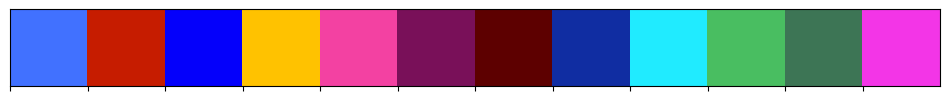

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import glasbey
import matplotlib.ticker as mtick

# Generate a color palette that accesible for the plots
palette = glasbey.create_palette(palette_size=12, colorblind_safe=True, cvd_severity=100)
sns.palplot(palette)
print(palette)

# Change it to True for plotting the figures
plot_i = True
plot_t = False
plot_p = False

In [31]:
def get_relevant_cats_for_subject(df, category, low = 0, max = None, subject = 'papers'):

    if max == None:
        max = len(df)

    df_subject = df[df['subject'] == subject].copy()
    df_subject = df_subject.sort_values(by='Normalized_Counts', ascending=False).iloc[low:max][category]
    df_subject = df[df[category].isin(df_subject)]
    
    return df_subject.copy()

def fn_data_to_plot(variable_plotting, df_full_copy, break_line ='\n'):
    #This is needed if we want to be consistent with plotly and seaborn. Otherways the 0 counts aare not taken into account 
    cleaned_categories = [x for x in df_full_copy[variable_plotting].unique() if pd.notnull(x)]
    all_combinations = pd.MultiIndex.from_product([cleaned_categories, df_full_copy['subject'].unique()], names=[variable_plotting, 'subject'])
    full_dfA = pd.DataFrame(index=all_combinations).reset_index()
    # Drop duplicates of categories per ID 
    df_full_variable_unique = df_full_copy[['ID',variable_plotting, 'subject']].drop_duplicates()
    unique_counts = df_full_variable_unique.groupby([variable_plotting, 'subject']).size().reset_index(name='Counts')
    result_df = full_dfA.merge(unique_counts, on=[variable_plotting, 'subject'], how='left').fillna(0)
    result_df['Counts'] = result_df['Counts'].astype(int)
    result_df['subject'] = pd.Categorical(result_df['subject'], categories=custom_order, ordered=True)
    unique_ids_per_subject = df_full_copy.groupby('subject')['ID'].nunique().reset_index(name='Unique_IDs')
    df_unique_categories = result_df.merge(unique_ids_per_subject, on='subject')
    df_unique_categories['Normalized_Counts'] = df_unique_categories['Counts'] / df_unique_categories['Unique_IDs']
    df_unique_categories['Name_bar'] = df_unique_categories.apply(
    lambda row: (
        ""  # If Counts is 0
        if row['Counts'] == 0 
        else (
            f"{row['Normalized_Counts']*100:.0f}%\n({row['Counts']})"  # No decimals if Normalized_Counts == 1
            if row['Normalized_Counts'] == 1 
            else f"{row['Normalized_Counts']*100:.1f}% ({row['Counts']})"  # 1 decimal place otherwise
        )
    ),
    axis=1
    )

    df_unique_categories['subject'] = pd.Categorical(df_unique_categories['subject'], categories=custom_order, ordered=True)
    sorted_result_df = df_unique_categories.sort_values(by=['subject', 'Counts'], ascending=[True, False])
    
    return sorted_result_df

# Function to plot graphics
def plot_data_with_tips(data_to_plot, variable_plotting, name, sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 10, inchb = 15, x_legend = 1, y_legend = 0.2, gopa = 0.4, percentages = True, name_bars = True, tips_x_space = 0.04, tips_x_space_0 = 0.03, tips_x_space_1 = 0.01, fontsize = 9, color_map = {'interviews': '#c61c00', 'papers': '#4171ff', 'surveys': '#49be61'}, y_position_shift_tips = 0):
    
    sns.set_theme(rc={'figure.figsize':(figsizea,figsizeb)})
    sns.set_theme(style="whitegrid")
    fig=plt.figure(figsize=(sizea,sizeb))

    g = sns.catplot(
        data=data_to_plot, kind="bar",
        y=f'{variable_plotting}', x="Normalized_Counts", hue="subject",
        errorbar="sd", palette=color_map, alpha=1, orient='h', aspect=100/10
    )
    g.figure.set_size_inches(incha,inchb)
    g.despine(left=True)
    g.set_axis_labels("", "")
    ax = g.ax
    if percentages:
        ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

    if name_bars:
        for c, (i,groupp) in zip(ax.containers,  data_to_plot.groupby("subject")):
            for p, (j,d) in zip(c,  groupp.iterrows()):
                y = p.get_y() + p.get_height() / 2 + y_position_shift_tips  # Bar's center y-position
                width = p.get_width()
                x = p.get_x()
                value = width 
                if value == 0:
                    ax.text(value +tips_x_space_0, y, f"",
                                va='center', ha='center', color='black', fontsize=fontsize)  # Useless, just in case that someone wants 0% displayed
                elif value == 1:
                    ax.text(value + tips_x_space_1, y, f"{value*100:.0f}%",
                                va='center', ha='center', color='black', fontsize=fontsize)
                else:
                    ax.text(value +tips_x_space, y, f"{value*100:.1f}%",
                                va='center', ha='center', color='black', fontsize=fontsize)  # Inside with bold text

    ax.xaxis.grid(True, linestyle='-', color='gray', alpha=gopa)  # Lighten grid lines
    g.legend.set_title("")
    g.tight_layout()
    # Adjust legend position to bottom right
    g._legend.set_bbox_to_anchor((x_legend, y_legend))  # Bottom right within the plot area
    g._legend.set_loc("lower right")  # Bottom right outside the plot area
    g.figure.savefig(f'../Data/axial_codes/result_{variable_plotting}_plot_{name}.pdf')

In [32]:
# Re-creating the sample data
color_map = {
    'interviews': '#c61c00',
    'papers': '#4171ff',
    'surveys': '#49be61'
}
custom_order = ['papers', 'interviews', 'surveys']

## Plot Input categories

In [33]:
# new
variable_plotting= 'Input_axial'
soreted_data = fn_data_to_plot(variable_plotting, df_full_copy)
print(f'Number of unique categories for {variable_plotting}', soreted_data[variable_plotting].nunique())
data_to_plot_1 = get_relevant_cats_for_subject(soreted_data, variable_plotting, low = 0, max = 24, subject = 'papers')
data_to_plot_2 = get_relevant_cats_for_subject(soreted_data, variable_plotting, low = 24,  subject = 'papers')
print(f'Final shape of the dataframe to be plotted for {variable_plotting}', data_to_plot_1.shape)
print(f'Final shape of the dataframe to be plotted for {variable_plotting}', data_to_plot_2.shape)

Number of unique categories for Input_axial 49
Final shape of the dataframe to be plotted for Input_axial (72, 6)
Final shape of the dataframe to be plotted for Input_axial (75, 6)


In [34]:
soreted_data[[variable_plotting, 'subject', 'Counts', 'Unique_IDs', 'Normalized_Counts']].to_excel(f'../Data/axial_codes/result_{variable_plotting}_counts.xlsx', index=False)

/tmp/ipykernel_825282/2080289357.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for c, (i,groupp) in zip(ax.containers,  data_to_plot.groupby("subject")):


<Figure size 20000x20000 with 0 Axes>

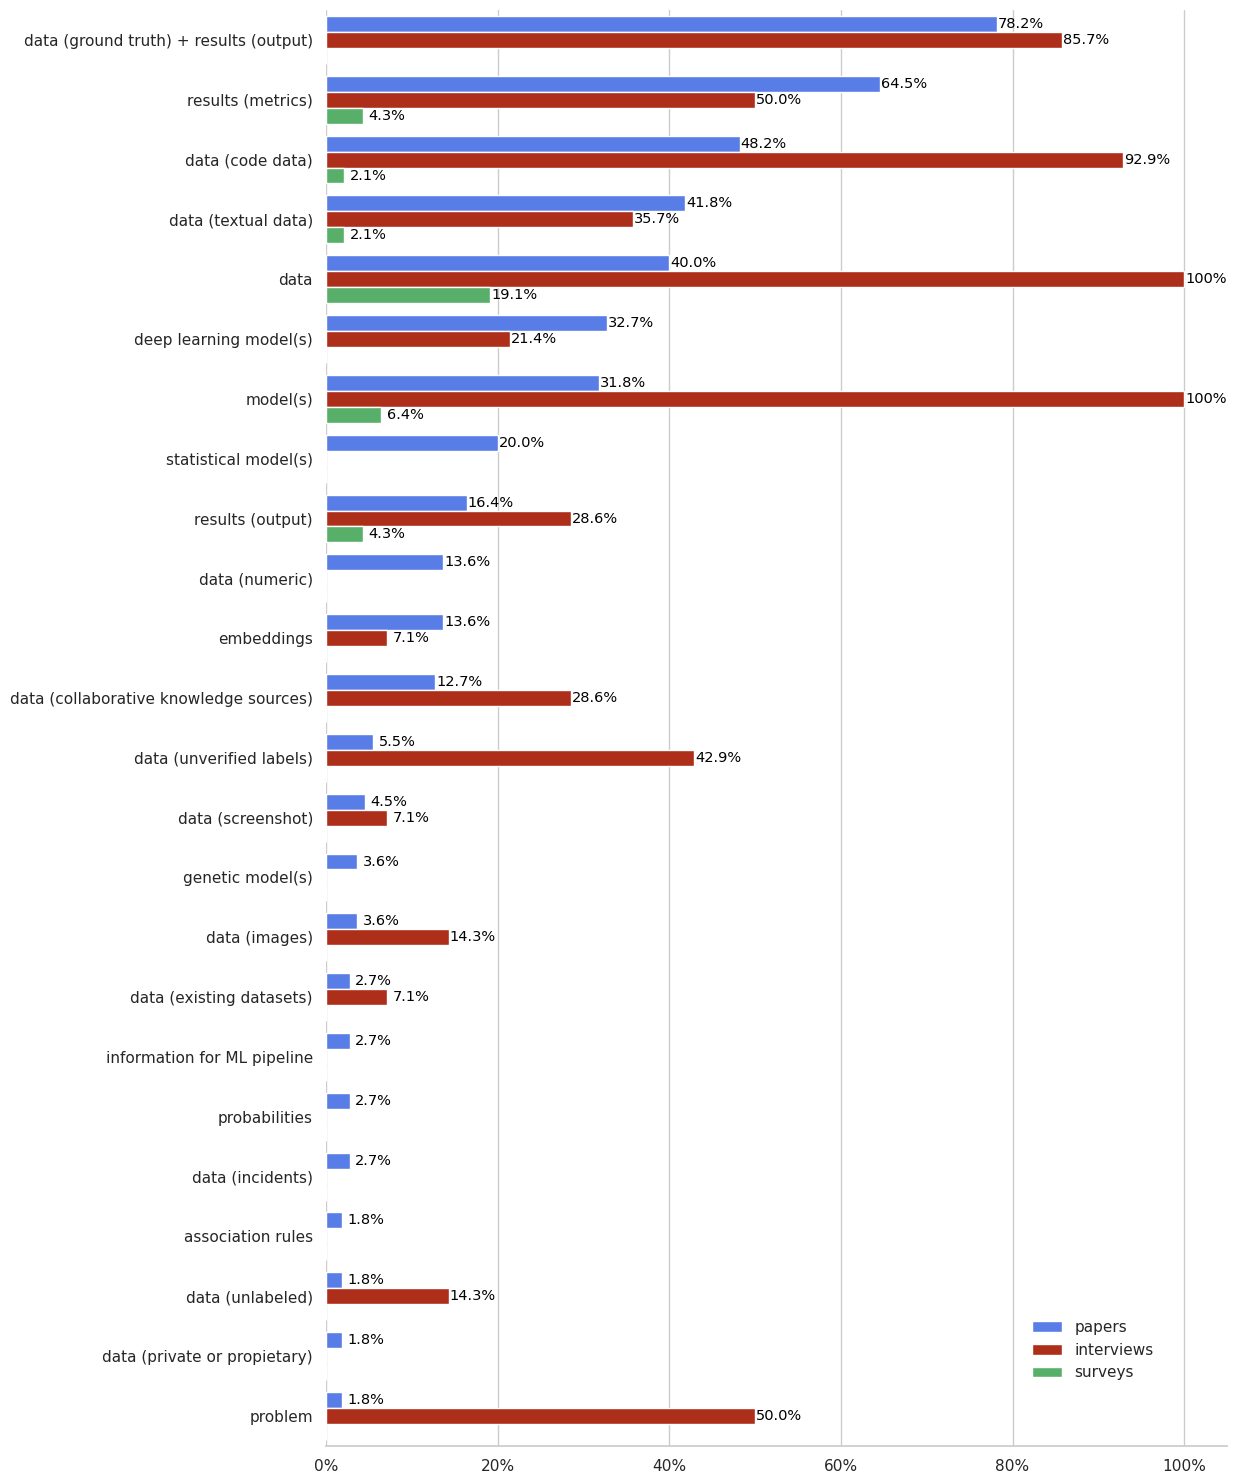

In [35]:
if plot_i:
    # data_to_plot_1 = data_to_plot_1.copy(deep=True).sort_index()
    plot_data_with_tips(data_to_plot_1, variable_plotting, '1', sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 13, inchb = 15, x_legend=0.898, y_legend = 0.06, tips_x_space = 0.028, tips_x_space_1 = 0.026, fontsize = 10.5)

/tmp/ipykernel_825282/2080289357.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for c, (i,groupp) in zip(ax.containers,  data_to_plot.groupby("subject")):


<Figure size 20000x20000 with 0 Axes>

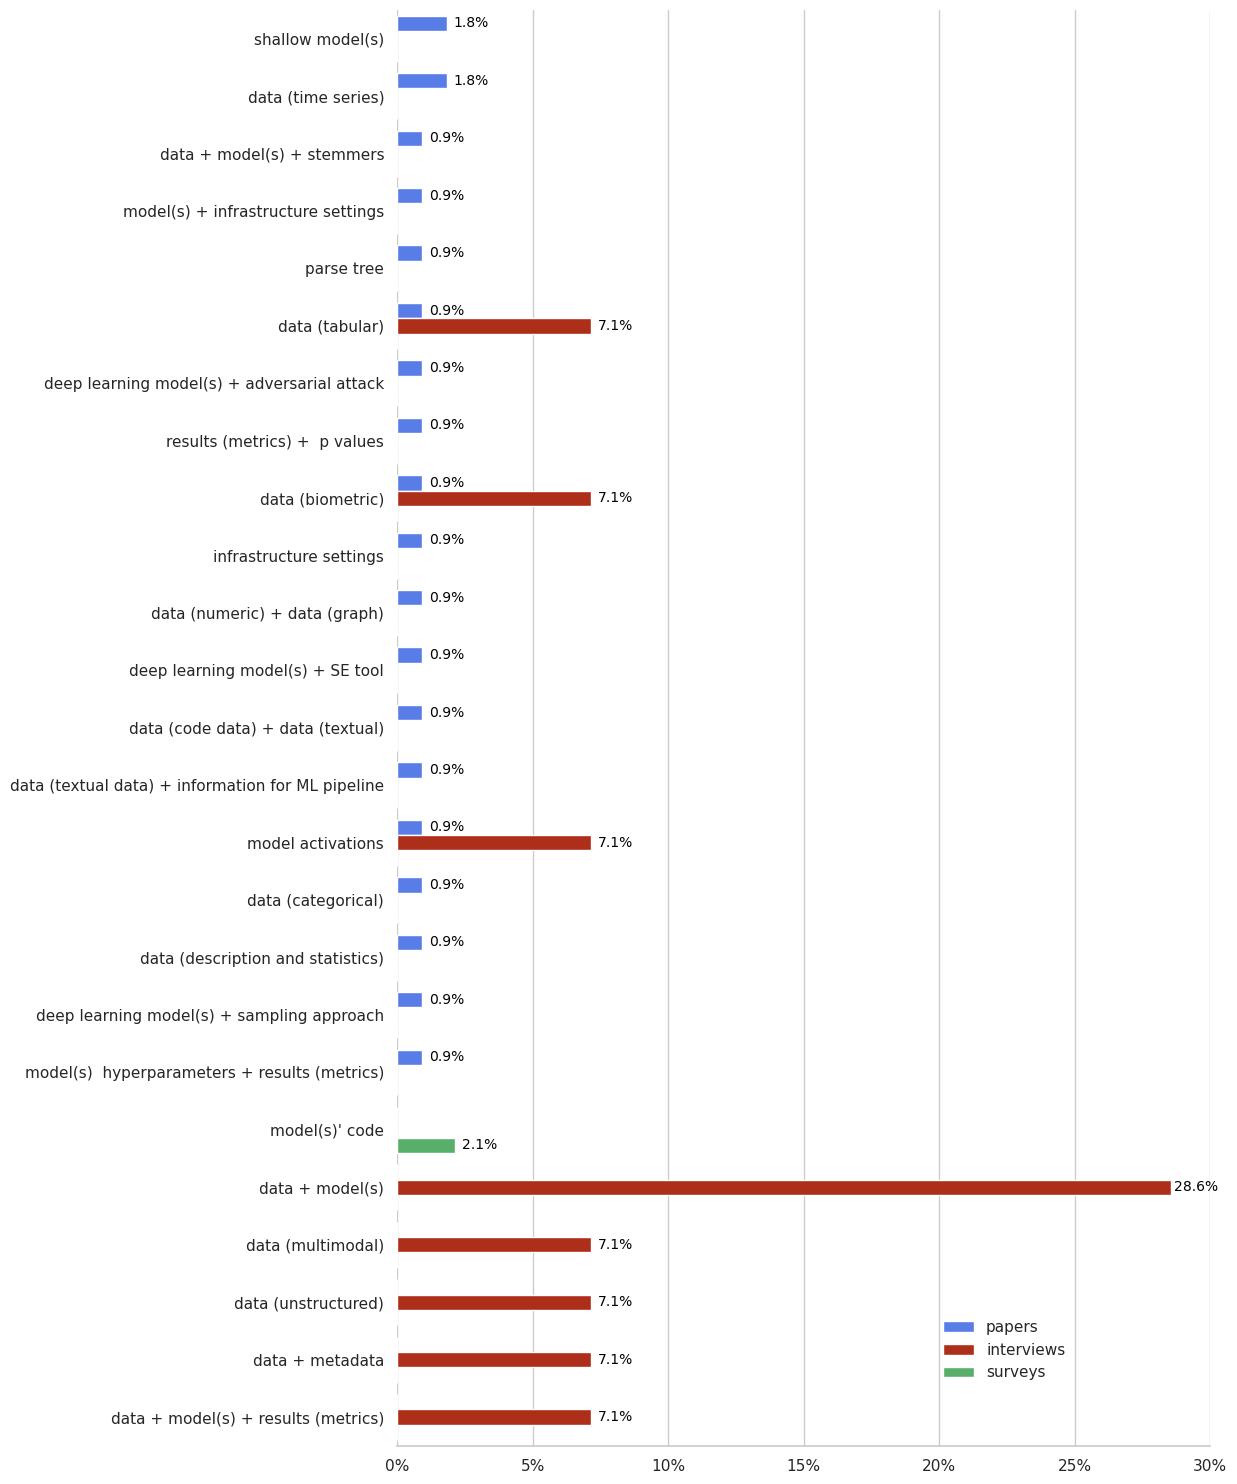

In [36]:
if plot_i:
    plot_data_with_tips(data_to_plot_2, variable_plotting, '2', sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 13, inchb = 15,x_legend=0.83, y_legend = 0.06, tips_x_space = 0.009, tips_x_space_1 = 0.035, fontsize = 10)

## Plot Technique

In [37]:
variable_plotting= 'Technique_axial'
soreted_datat = fn_data_to_plot(variable_plotting, df_full_copy)
print(f'Number of unique categories for {variable_plotting}', soreted_datat[variable_plotting].nunique())
data_to_plot_t1 = get_relevant_cats_for_subject(soreted_datat, variable_plotting, low = 0, max = 30, subject = 'papers')
data_to_plot_t2 = get_relevant_cats_for_subject(soreted_datat, variable_plotting, low = 30, max = 60, subject = 'papers')
data_to_plot_t3 = get_relevant_cats_for_subject(soreted_datat, variable_plotting, low = 60, max = 90, subject = 'papers')
data_to_plot_t4 = get_relevant_cats_for_subject(soreted_datat, variable_plotting, low = 90, max = 120, subject = 'papers')
data_to_plot_t5 = get_relevant_cats_for_subject(soreted_datat, variable_plotting, low = 120, max = 150, subject = 'papers')
data_to_plot_t6 = get_relevant_cats_for_subject(soreted_datat, variable_plotting, low = 150, subject = 'papers')

print(f'Final shape of the dataframe to be plotted for {variable_plotting}', data_to_plot_t1.shape, '1')
print(f'Final shape of the dataframe to be plotted for {variable_plotting}', data_to_plot_t2.shape, '2')
print(f'Final shape of the dataframe to be plotted for {variable_plotting}', data_to_plot_t3.shape, '3')
print(f'Final shape of the dataframe to be plotted for {variable_plotting}', data_to_plot_t4.shape, '4')
print(f'Final shape of the dataframe to be plotted for {variable_plotting}', data_to_plot_t5.shape, '5')
print(f'Final shape of the dataframe to be plotted for {variable_plotting}', data_to_plot_t6.shape, '6')

Number of unique categories for Technique_axial 176
Final shape of the dataframe to be plotted for Technique_axial (90, 6) 1
Final shape of the dataframe to be plotted for Technique_axial (90, 6) 2
Final shape of the dataframe to be plotted for Technique_axial (90, 6) 3
Final shape of the dataframe to be plotted for Technique_axial (90, 6) 4
Final shape of the dataframe to be plotted for Technique_axial (90, 6) 5
Final shape of the dataframe to be plotted for Technique_axial (78, 6) 6


In [38]:
soreted_datat[[variable_plotting, 'subject', 'Counts', 'Unique_IDs', 'Normalized_Counts']].to_excel(f'../Data/axial_codes/result_{variable_plotting}_counts.xlsx', index=False)

In [39]:
if plot_t:
    plot_data_with_tips(data_to_plot_t1, variable_plotting, '1', sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 13, inchb = 15, x_legend=0.92, y_legend = 0.04, gopa = 0.3, tips_x_space = 0.031, tips_x_space_1 = 0.01, fontsize = 10, y_position_shift_tips = 0.04)

In [40]:
if plot_t:
    data_to_plot_t2.loc[data_to_plot_t2[variable_plotting] == 'share model, code and/or resources (non physical) used during the ml process', variable_plotting] = 'share model, code and/or resources used'
    plot_data_with_tips(data_to_plot_t2, variable_plotting, '2', sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 13, inchb = 15, x_legend=0.87, y_legend = 0.04, gopa = 0.3, tips_x_space = 0.023, tips_x_space_1 = 0.035, fontsize = 9.5, y_position_shift_tips = 0.04)


In [41]:

if plot_t:
    plot_data_with_tips(data_to_plot_t3, variable_plotting, '3', sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 13, inchb = 15, x_legend=0.94, y_legend = 0.055, gopa = 0.3, tips_x_space = 0.028, tips_x_space_1 = 0.038, fontsize = 9.5, y_position_shift_tips = 0.04)


In [42]:
if plot_t:
    plot_data_with_tips(data_to_plot_t4, variable_plotting, '4', sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 13, inchb = 15, x_legend=0.89, y_legend = 0.04, gopa = 0.3, tips_x_space = 0.02, tips_x_space_1 = 0.038, fontsize = 9.5, y_position_shift_tips = 0.04)

In [43]:
if plot_t:
    data_to_plot_t5.loc[data_to_plot_t5[variable_plotting] == 'feature engineering, compute features that describe relation between developers and code', variable_plotting] = 'compute feat. that describe relation between developers and code'
    data_to_plot_t5.loc[data_to_plot_t5[variable_plotting] == 'feature engineering, compute features that describe developer contributions', variable_plotting] = 'compute feat. that describe developer contributions'

    plot_data_with_tips(data_to_plot_t5, variable_plotting, '5', sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 13, inchb = 15, x_legend=0.87, y_legend = 0.04, gopa = 0.3, tips_x_space = 0.03, tips_x_space_1 = 0.028, fontsize = 9.5, y_position_shift_tips = 0.04)

In [44]:
if plot_t:
    plot_data_with_tips(data_to_plot_t6, variable_plotting, '6', sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 13, inchb = 15, x_legend=0.87, y_legend = 0.04, gopa = 0.3, tips_x_space = 0.01, tips_x_space_1 = 0.038, fontsize = 9.5, y_position_shift_tips = 0.04)

## Plot Purpose

In [45]:
variable_plotting= 'Purpose_Output_axial'
soreted_datap = fn_data_to_plot(variable_plotting, df_full_copy)
print(f'Number of unique categories for {variable_plotting}', soreted_datap[variable_plotting].nunique())
data_to_plot_p1 = get_relevant_cats_for_subject(soreted_datap, variable_plotting, low = 0, max = 24, subject = 'papers')
data_to_plot_p2 = get_relevant_cats_for_subject(soreted_datap, variable_plotting, low = 24, max = 48, subject = 'papers')
data_to_plot_p3 = get_relevant_cats_for_subject(soreted_datap, variable_plotting, low = 48, subject = 'papers')

print(f'Final shape of the dataframe to be plotted for {variable_plotting}', data_to_plot_p1.shape, '1')
print(f'Final shape of the dataframe to be plotted for {variable_plotting}', data_to_plot_p2.shape, '2')
print(f'Final shape of the dataframe to be plotted for {variable_plotting}', data_to_plot_p3.shape, '3')

Number of unique categories for Purpose_Output_axial 72
Final shape of the dataframe to be plotted for Purpose_Output_axial (72, 6) 1
Final shape of the dataframe to be plotted for Purpose_Output_axial (72, 6) 2
Final shape of the dataframe to be plotted for Purpose_Output_axial (72, 6) 3


In [46]:
soreted_datap[[variable_plotting, 'subject', 'Counts', 'Unique_IDs', 'Normalized_Counts']].to_excel(f'../Data/axial_codes/result_{variable_plotting}_counts.xlsx', index=False)

In [47]:
if plot_p :
    data_to_plot_p1.loc[data_to_plot_p1[variable_plotting] == 'to design model components (e.g., output, input, parameters)', variable_plotting] = 'to design model components'
    plot_data_with_tips(data_to_plot_p1, variable_plotting, '1', sizea = 300, sizeb = 300, figsizea = 600, figsizeb = 600, incha = 13, inchb = 15, x_legend=0.83, y_legend = 0.055, gopa = 0.3, tips_x_space = 0.03, tips_x_space_1 = 0.038, fontsize = 9.5, y_position_shift_tips = 0.04)

In [48]:
if plot_p:
    plot_data_with_tips(data_to_plot_p2, variable_plotting, '2', sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 12, inchb = 15, x_legend=0.93, y_legend = 0.055, gopa = 0.3, tips_x_space = 0.04, tips_x_space_1 = 0.03, fontsize = 9.5, y_position_shift_tips = 0.04)

In [49]:
if plot_p:
    plot_data_with_tips(data_to_plot_p3, variable_plotting, '3', sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 12, inchb = 15, x_legend=0.91, y_legend = 0.055, gopa = 0.3, tips_x_space = 0.026, tips_x_space_1 = 0.05, fontsize = 9.5, y_position_shift_tips = 0.04)

## Plot for ML pipeline stage

In [50]:

def fn_data_to_plot(variable_plotting, df_full_copy):
    #This is needed if we want to be consistent with plotly and seaborn. Otherways the 0 counts aare not taken into account 
    cleaned_categories = [x for x in df_full_copy[variable_plotting].unique() if pd.notnull(x)]
    all_combinations = pd.MultiIndex.from_product([cleaned_categories, df_full_copy['subject'].unique()], names=[variable_plotting, 'subject'])
    full_dfA = pd.DataFrame(index=all_combinations).reset_index()
    # Drop duplicates of categories per ID 
    df_full_variable_unique = df_full_copy[['ID',variable_plotting, 'subject']].drop_duplicates()
    unique_counts = df_full_variable_unique.groupby([variable_plotting, 'subject']).size().reset_index(name='Counts')
    result_df = full_dfA.merge(unique_counts, on=[variable_plotting, 'subject'], how='left').fillna(0)
    result_df['Counts'] = result_df['Counts'].astype(int)
    result_df['subject'] = pd.Categorical(result_df['subject'], categories=custom_order, ordered=True)
    # Get the number of unique IDs per subject
    unique_ids_per_subject = df_full_copy.groupby('subject')['ID'].nunique().reset_index(name='Unique_IDs')
    # Add the information of unique IDs per subject to the same dataframe of the counts to be able to normalize the counts
    df_unique_categories = result_df.merge(unique_ids_per_subject, on='subject')
    df_unique_categories['Normalized_Counts'] = df_unique_categories['Counts'] / df_unique_categories['Unique_IDs']
    df_unique_categories['Name_bar'] = df_unique_categories.apply(lambda row: f"{row['Normalized_Counts']*100:.1f}%\n({row['Counts']})", axis=1)
    df_unique_categories['subject'] = pd.Categorical(df_unique_categories['subject'], categories=custom_order, ordered=True)
    sorted_result_df = df_unique_categories.sort_values(by=['subject', 'Counts'], ascending=[True, False])
    
    return sorted_result_df

def plot_data(data_to_plot, variable_plotting, name, sizea = 200, sizeb = 200, figsizea = 500, figsizeb = 500, incha = 10, inchb = 15, x_legend = 1, y_legend = 0.2, gopa = 0.4, percentages = True, name_bars = True, tips_x_space = 0.04, tips_x_space_0 = 0.03, tips_x_space_1 = 0.01):
    
    sns.set_theme(rc={'figure.figsize':(figsizea,figsizeb)})
    sns.set_theme(style="whitegrid")
    fig=plt.figure(figsize=(sizea,sizeb))
    # Draw a nested barplot by species and sex
    g = sns.catplot(
        data=data_to_plot, kind="bar",
        y=f'{variable_plotting}', x="Normalized_Counts", hue="subject",
        errorbar="sd", palette=color_map, alpha=1, orient='h', aspect=100/10
    )
    g.figure.set_size_inches(incha,inchb)
    g.despine(left=True)
    g.set_axis_labels("", "")
    ax = g.ax
    if percentages:
        ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

    if name_bars:
        for c, (i,groupp) in zip(ax.containers,  data_to_plot.groupby("subject")):
            for p, (j,d) in zip(c,  groupp.iterrows()):
                # Find the corresponding row based on bar coordinates
                y = p.get_y() + p.get_height() / 2 
                width = p.get_width()
                x = p.get_x()
                value = width 
                if value == 0:
                    ax.text(value +tips_x_space_0, y, f"",
                                va='center', ha='center', color='black', fontsize=9)  # Just needed in the case that 0% is displayed
                elif value == 1:
                    ax.text(value + tips_x_space_1, y, d.Name_bar,
                                va='center', ha='center', color='black', fontsize=9)
                else:
                    ax.text(value +tips_x_space, y, d.Name_bar,
                                va='center', ha='center', color='black', fontsize=9)  # Inside with bold text


    ax.xaxis.grid(True, linestyle='-', color='gray', alpha=gopa)  # Lighten grid lines
    g.legend.set_title("")
    g.tight_layout()
    # Adjust legend position to bottom right
    g._legend.set_bbox_to_anchor((x_legend, y_legend))  # Bottom right within the plot area
    g._legend.set_loc("lower right")  # Bottom right outside the plot area
    g.figure.savefig(f'../Data/axial_codes/result_{variable_plotting}_plot_{name}.pdf')

    

In [51]:
variable_plotting= 'Stage_axial'
soreted_dataML = fn_data_to_plot(variable_plotting, df_full_copy)
print(f'Number of unique categories for {variable_plotting}', soreted_dataML[variable_plotting].nunique())
data_to_plot_ML1 = get_relevant_cats_for_subject(soreted_dataML, variable_plotting, low = 0, subject = 'papers')
print(f'Final shape of the dataframe to be plotted for {variable_plotting}', soreted_dataML.shape)

Number of unique categories for Stage_axial 10
Final shape of the dataframe to be plotted for Stage_axial (30, 6)


In [52]:
soreted_dataML[[variable_plotting, 'subject', 'Counts', 'Unique_IDs', 'Normalized_Counts']].to_excel(f'../Data/axial_codes/result_{variable_plotting}_counts.xlsx', index=False)

/tmp/ipykernel_825282/2394006470.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for c, (i,groupp) in zip(ax.containers,  data_to_plot.groupby("subject")):


<Figure size 10000x10000 with 0 Axes>

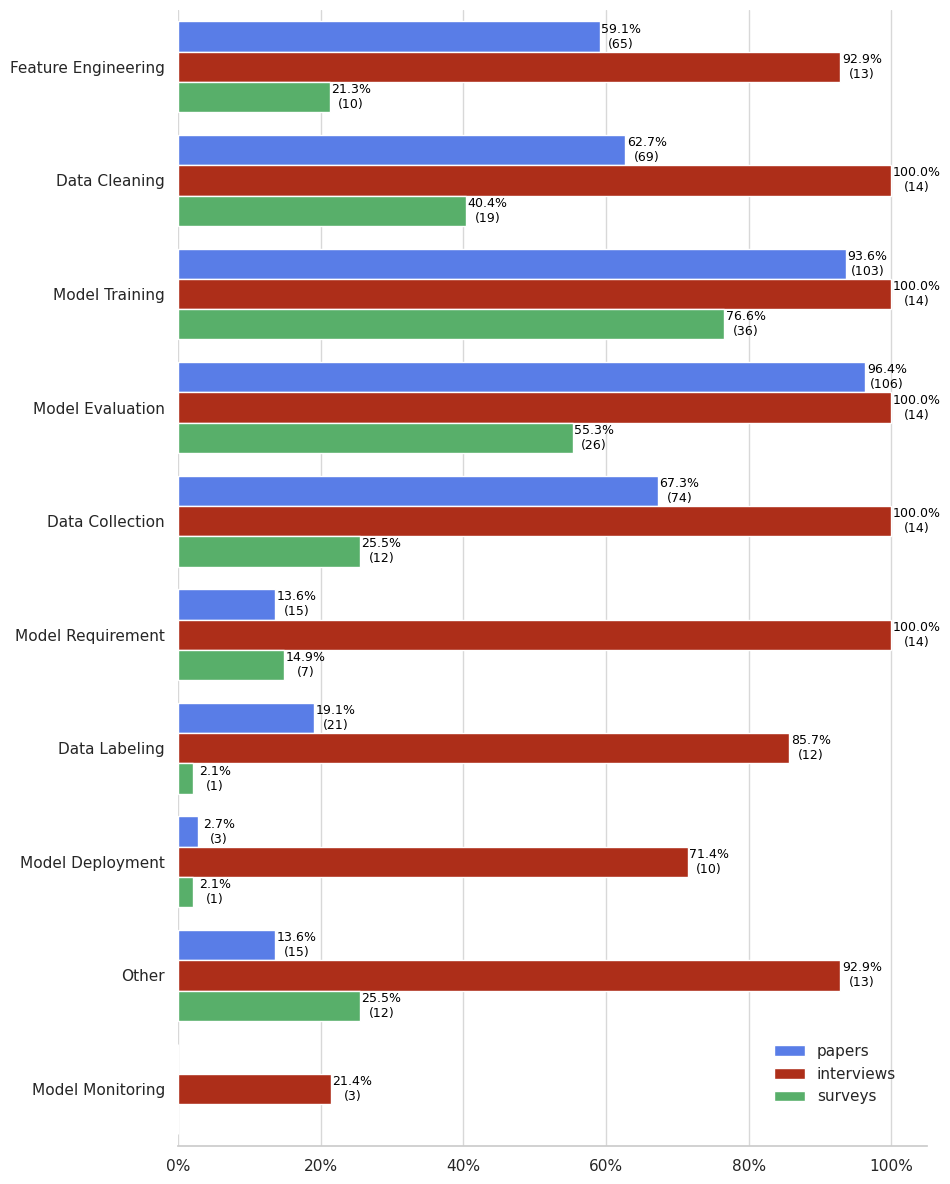

In [53]:
data_to_plot_ML1 = data_to_plot_ML1.copy(deep=True).sort_index()
plot_data(data_to_plot_ML1, variable_plotting, '1', sizea = 100, sizeb = 100, figsizea = 100, figsizeb = 100, incha = 10, inchb = 12, x_legend=0.91, y_legend = 0.055, gopa = 0.3, tips_x_space = 0.03, tips_x_space_1 = 0.035)

## Plot for SE tasks

In [54]:
def data_norm_counts(variable_plotting, df_full_copy, subject = 'papers'):

    len_norm = 110 if subject == 'papers' else 14
    df_full_copy_v = df_full_copy[(df_full_copy['subject'] == subject)].copy()
    # df_full_copy_v = df_full_copy[(df_full_copy['subject'] == 'interviews') | (df_full_copy['subject'] == 'papers')].copy()
    
    df_full_copy_v = df_full_copy_v[['ID',variable_plotting]].drop_duplicates()
    df_full_copy_v.dropna(subset=[variable_plotting], inplace=True)
    unique_counts = df_full_copy_v.groupby([variable_plotting]).size().reset_index(name='Counts')
    unique_counts['Normalized_Counts'] = unique_counts['Counts'] /len_norm
    unique_counts['Name_bar'] = unique_counts.apply(lambda row: f"{row['Normalized_Counts']*100:.1f}% \n ({row['Counts']})", axis=1)
    unique_counts = unique_counts.sort_values(by='Counts', ascending=False)


    return unique_counts

def plot_normalized_counts(data_to_plot, variable_plotting, plot_name, sizea = 10, sizeb = 5, figsizea = 200, figsizeb = 200, incha = 13, inchb = 5, color = '#20d2ff', gopa = 0.2, name_bars = True, percentages = True):
    fig = plt.figure(figsize=(sizea, sizeb))
    sns.set_theme(rc={'figure.figsize':(figsizea,figsizeb)})
    sns.set_theme(style="whitegrid")
    g = sns.catplot(
        data=data_to_plot, kind="bar",
        y=f'{variable_plotting}', x="Normalized_Counts",
          color= color, alpha=1, orient='h'
    )
    ax = g.ax
    ax.xaxis.grid(True, linestyle='-', color='gray', alpha=gopa)  # Lighten grid lines

    if percentages:
        ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

    if name_bars:
        text_index = 0
        # Add values to the bars
        for container in ax.containers:
            for bar in container:
                width = bar.get_width()  # Get the bar's width (value for horizontal bars)
                ypos = bar.get_y() + bar.get_height() / 2  # Position at the center of the bar
                ax.text(width +0.001, ypos,  data_to_plot['Name_bar'].iloc[text_index], va='center', ha='left', fontsize=12)  # Adjust formatting and placement
                text_index +=1

    g.figure.set_size_inches(incha,inchb) 
    g.despine(left=True)
    g.set_axis_labels("", "")
    g.tight_layout()
    g.figure.savefig(f'../Data/axial_codes/result_{variable_plotting}_plot_{plot_name}.pdf')
    

<Figure size 1000x500 with 0 Axes>

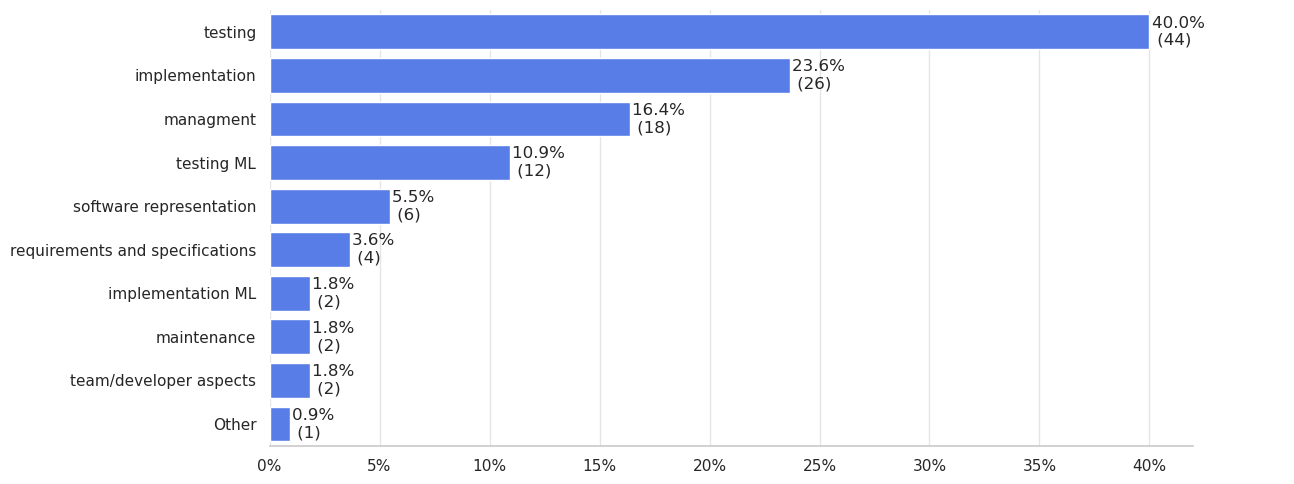

In [55]:
##b6005d
variable_plotting= 'SE_axial'
soreted_dataSE_task_P = data_norm_counts(variable_plotting, df_full_copy, subject='papers')
plot_normalized_counts(soreted_dataSE_task_P, variable_plotting, '1p', sizea = 10, sizeb = 5, figsizea = 200, figsizeb = 200, incha = 13, inchb = 5, color='#4171ff', gopa = 0.2)

In [56]:
soreted_dataSE_task_P.columns

Index(['SE_axial', 'Counts', 'Normalized_Counts', 'Name_bar'], dtype='object')

In [57]:
soreted_dataSE_task_P[[variable_plotting, 'Counts', 'Normalized_Counts']].to_excel(f'../Data/axial_codes/result_{variable_plotting}_papers_counts.xlsx', index=False)

<Figure size 1000x500 with 0 Axes>

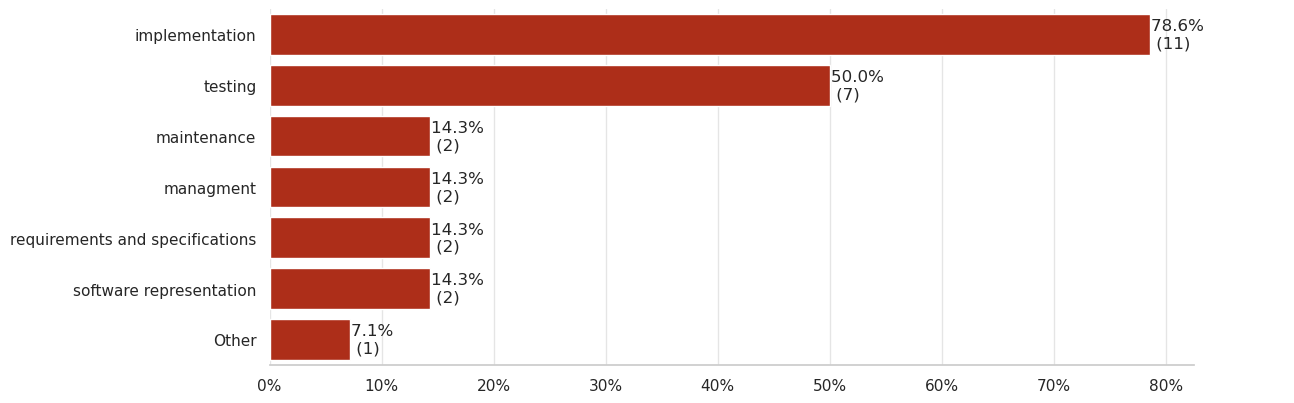

In [58]:
variable_plotting= 'SE_axial'
soreted_dataSE_task_I = data_norm_counts(variable_plotting, df_full_copy, subject='interviews')
plot_normalized_counts(soreted_dataSE_task_I, variable_plotting, '1i', sizea = 10, sizeb = 5, figsizea = 200, figsizeb = 200, incha = 13, inchb = 4.2, color='#c61c00', gopa = 0.2)

In [59]:
soreted_dataSE_task_I[[variable_plotting, 'Counts', 'Normalized_Counts']].to_excel(f'../Data/axial_codes/result_{variable_plotting}_interviews_counts.xlsx', index=False)

## Plot the data for The quality attributes

/home/anabanana/miniconda3/envs/gpaper/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

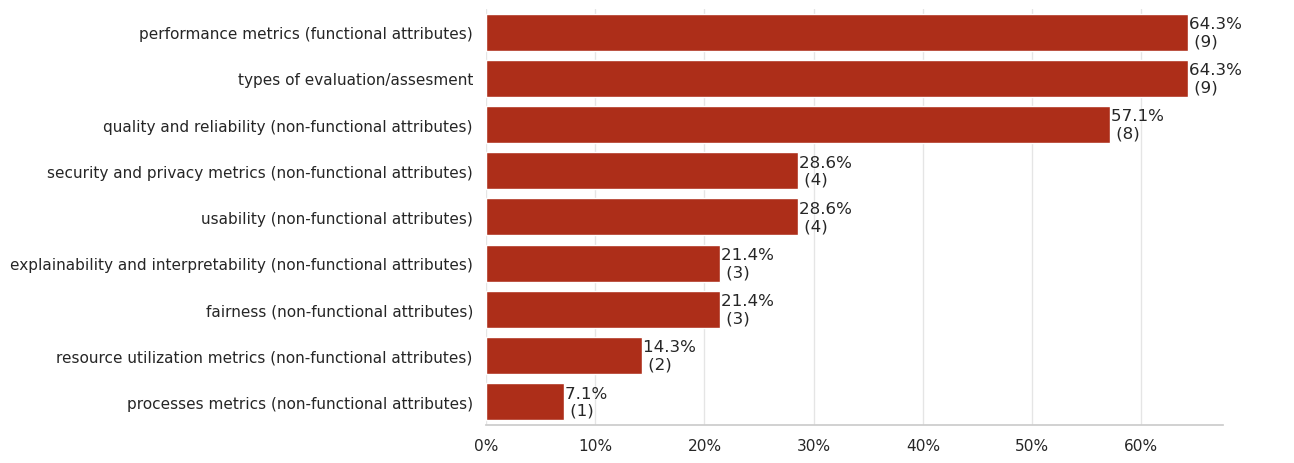

In [60]:
##b6005d
variable_plotting= 'QA_axial'
soreted_dataQA = data_norm_counts(variable_plotting, df_full_copy, subject='interviews')
soreted_dataQA.loc[soreted_dataQA[variable_plotting] == 'model governance (i.e., industry take seriously)', variable_plotting] = 'model governance'
plot_normalized_counts(soreted_dataQA, variable_plotting, '1', sizea = 10, sizeb = 5, figsizea = 200, figsizeb = 200, incha = 13, inchb = 4.8, color='#c61c00')

In [61]:
soreted_dataQA[[variable_plotting, 'Counts', 'Normalized_Counts']].to_excel(f'../Data/axial_codes/result_{variable_plotting}_interviews_counts.xlsx', index=False)

# Plot challenges

<Figure size 1000x500 with 0 Axes>

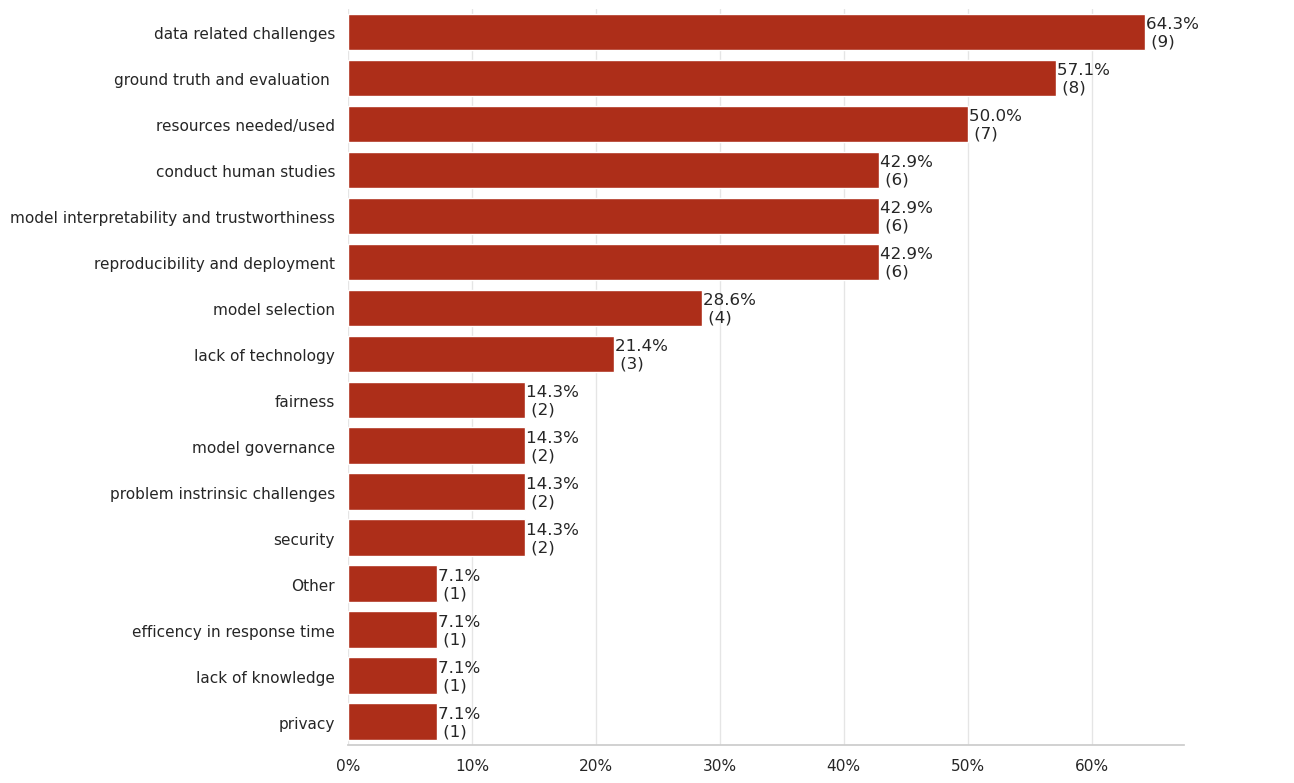

In [62]:
##b6005d
variable_plotting= 'Challenges_axial'
soreted_dataCH = data_norm_counts(variable_plotting, df_full_copy, subject='interviews')
plot_normalized_counts(soreted_dataCH, variable_plotting, '1', sizea = 10, sizeb = 5, figsizea = 200, figsizeb = 200, incha = 13, inchb = 8, color='#c61c00')

In [63]:
soreted_dataCH[[variable_plotting, 'Counts', 'Normalized_Counts']].to_excel(f'../Data/axial_codes/result_{variable_plotting}_interviews_counts.xlsx', index=False)

# Plot  Reviewer's perspectives  

<Figure size 1000x500 with 0 Axes>

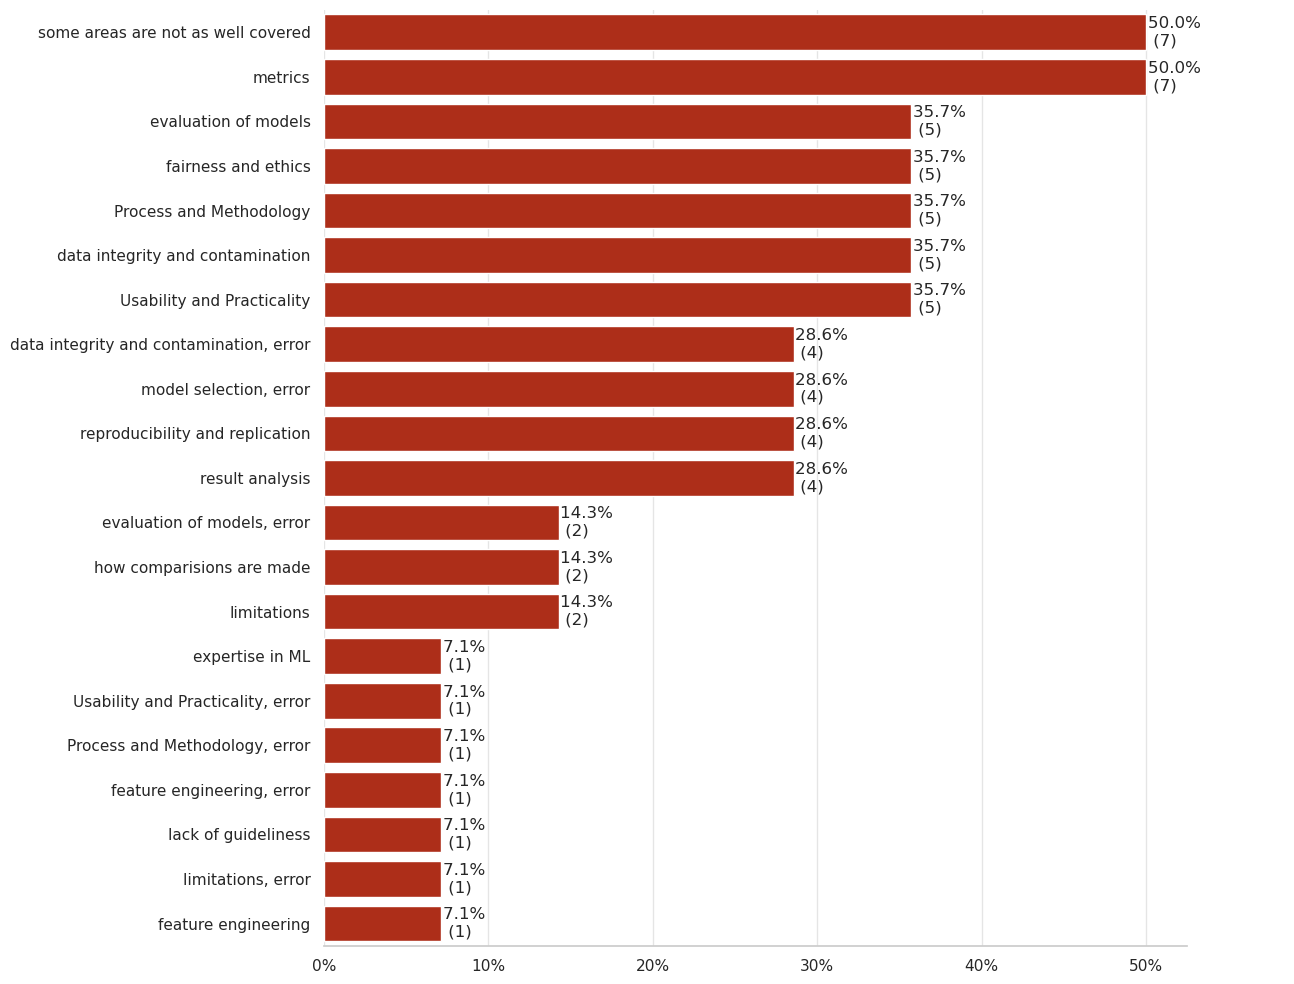

In [64]:
# reviewrs perspective
variable_plotting= 'Reviewers_axial'
soreted_dataR = data_norm_counts(variable_plotting, df_full_copy, subject='interviews')
plot_normalized_counts(soreted_dataR, variable_plotting, '1', sizea = 10, sizeb = 5, figsizea = 200, figsizeb = 200, incha = 13, inchb = 10, color='#c61c00')

In [65]:
soreted_dataR[[variable_plotting, 'Counts', 'Normalized_Counts']].to_excel(f'../Data/axial_codes/result_{variable_plotting}_interviews_counts.xlsx', index=False)

# Plot  Educators's perspectives  

<Figure size 1000x500 with 0 Axes>

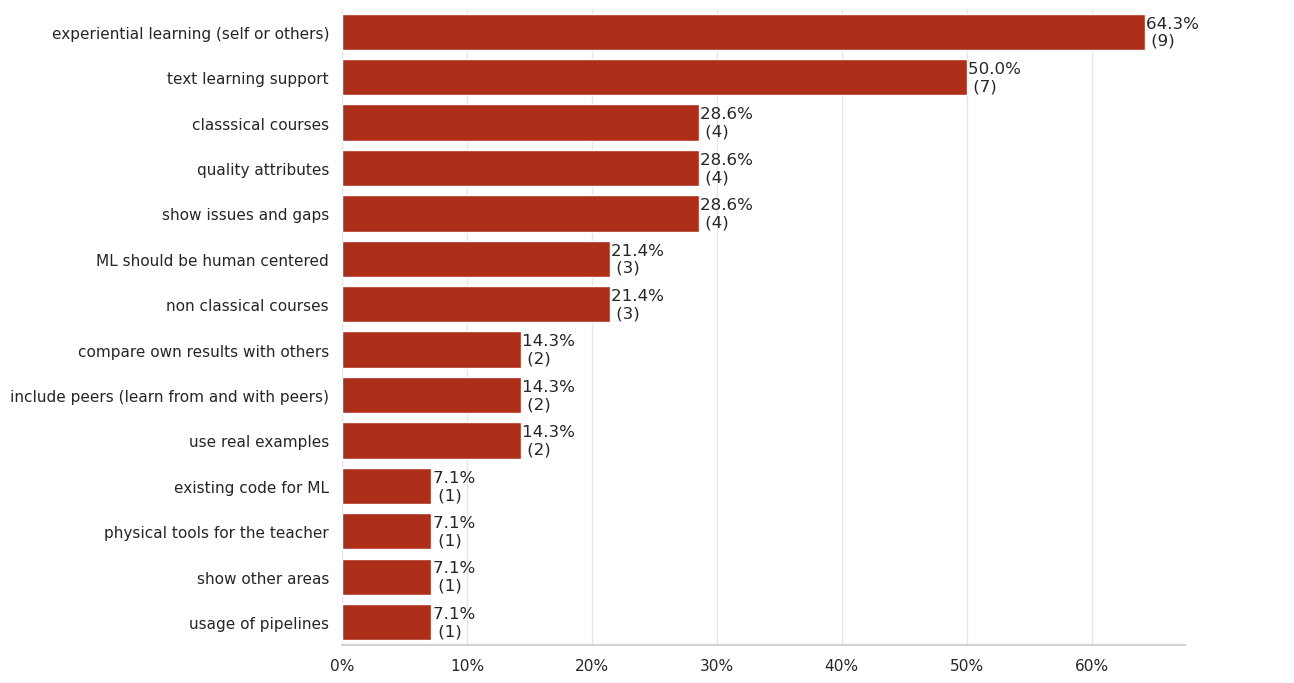

In [66]:
# reviewrs perspective
variable_plotting= 'Educators_axial'
soreted_dataE = data_norm_counts(variable_plotting, df_full_copy, subject='interviews')
plot_normalized_counts(soreted_dataE, variable_plotting, '1', sizea = 10, sizeb = 5, figsizea = 200, figsizeb = 200, incha = 13, inchb = 7, color='#c61c00')

In [67]:
soreted_dataE[[variable_plotting, 'Counts', 'Normalized_Counts']].to_excel(f'../Data/axial_codes/result_{variable_plotting}_interviews_counts.xlsx', index=False)